# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | strezhevoy
Processing Record 5 of Set 1 | shohimardon
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | vasylivka
Processing Record 9 of Set 1 | novo aripuana
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | riviere-du-loup
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | princeville
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | mehtar lam
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | kodiak
Processing Record 2

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.23,84,100,4.47,NZ,1687737911
1,tiksi,71.6872,128.8694,6.25,74,54,2.54,RU,1687737911
2,stanley,54.8680,-1.6985,13.20,92,20,4.12,GB,1687737939
3,strezhevoy,60.7333,77.5889,8.52,74,53,1.57,RU,1687737939
4,shohimardon,39.9839,71.8028,13.43,56,80,0.37,UZ,1687737940


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.23,84,100,4.47,NZ,1687737911
1,tiksi,71.6872,128.8694,6.25,74,54,2.54,RU,1687737911
2,stanley,54.8680,-1.6985,13.20,92,20,4.12,GB,1687737939
3,strezhevoy,60.7333,77.5889,8.52,74,53,1.57,RU,1687737939
4,shohimardon,39.9839,71.8028,13.43,56,80,0.37,UZ,1687737940


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

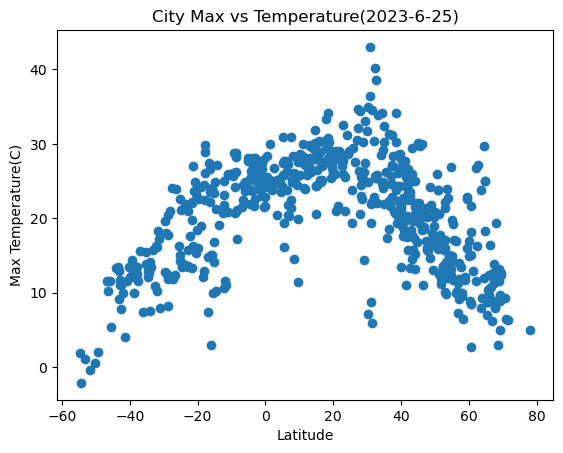

In [12]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x,y, marker = 'o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max vs Temperature(2023-6-25)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

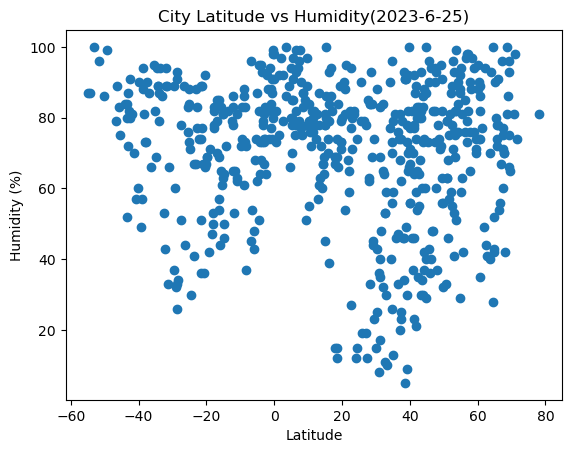

In [13]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']

plt.scatter(x,y, marker = 'o')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity(2023-6-25)')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

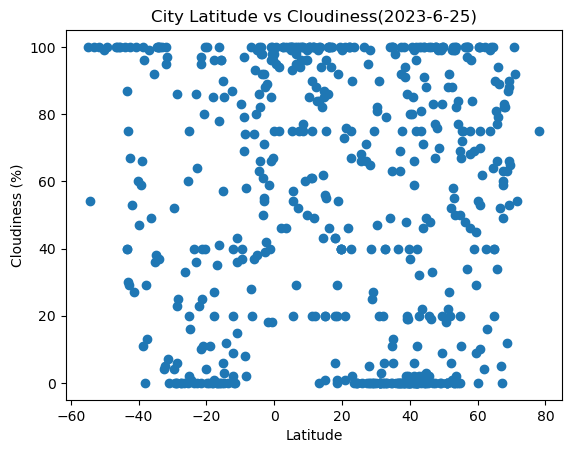

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

plt.scatter(x,y, marker = 'o')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness(2023-6-25)')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

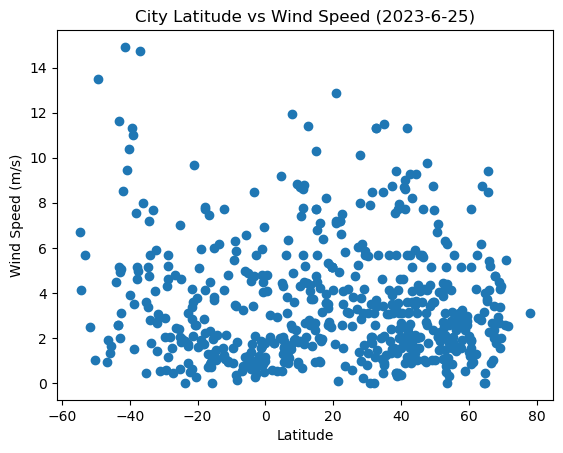

In [15]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']

plt.scatter(x,y, marker = 'o')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2023-6-25)')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
def create_lin_reg(x_values,y_values,x,y,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {rvalue**2}')
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,128.8694,6.25,74,54,2.54,RU,1687737911
2,stanley,54.8680,-1.6985,13.20,92,20,4.12,GB,1687737939
3,strezhevoy,60.7333,77.5889,8.52,74,53,1.57,RU,1687737939
4,shohimardon,39.9839,71.8028,13.43,56,80,0.37,UZ,1687737940
7,vasylivka,47.4369,35.2742,21.07,82,67,0.91,UA,1687737941


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.23,84,100,4.47,NZ,1687737911
5,invercargill,-46.4000,168.3500,10.24,89,100,1.91,NZ,1687737940
6,mar del plata,-38.0023,-57.5575,13.38,73,0,5.14,AR,1687737940
8,novo aripuana,-5.1206,-60.3797,27.75,62,99,1.03,BR,1687737941
11,port elizabeth,-33.9180,25.5701,14.16,87,100,5.66,ZA,1687737942


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4360813160202515


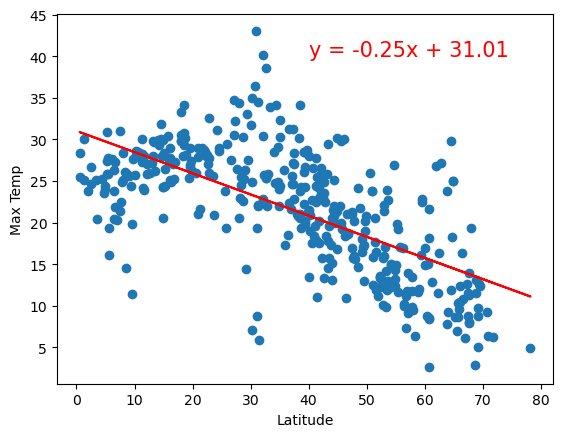

In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
ylabel = 'Max Temp'
x = 40
y = 40
create_lin_reg(x_values,y_values,x,y,ylabel)

The r-value is: 0.4360813160202515


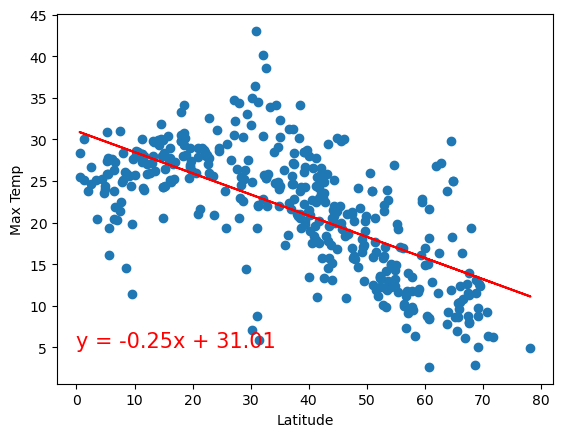

In [39]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
ylabel = 'Max Temp'
x = 0
y = 5
create_lin_reg(x_values,y_values,x,y,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002728038783339001


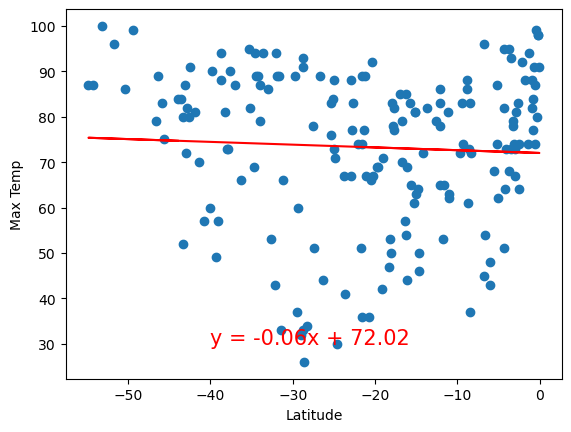

In [26]:
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Humidity"]
ylabel = 'Max Temp'
x = -40
y = 30
create_lin_reg(x_values,y_values,x,y,ylabel)

The r-value is: 0.4360813160202515


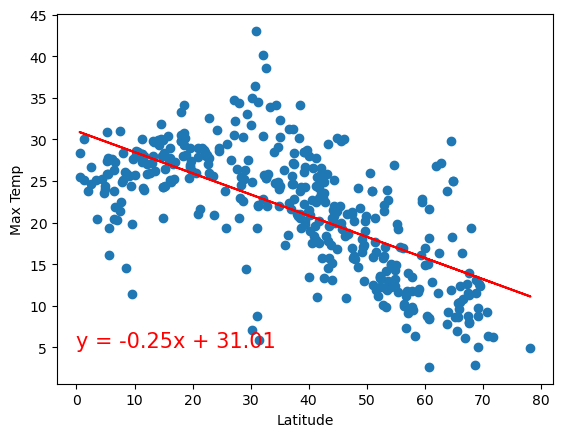

In [37]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
ylabel = 'Max Temp'
x = 0
y = 5
create_lin_reg(x_values,y_values,x,y,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01668245987125965


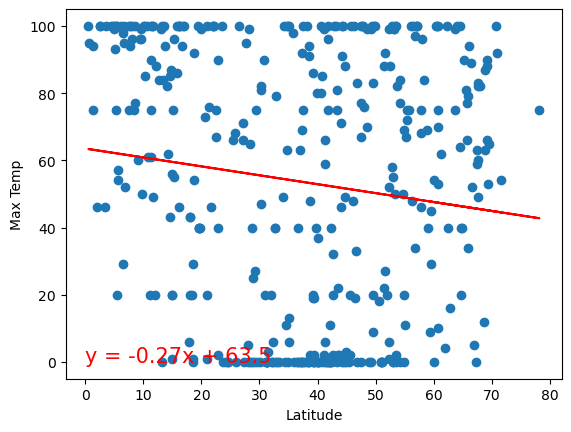

In [36]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
ylabel = 'Max Temp'
x = 0
y = 0
create_lin_reg(x_values,y_values,x,y,ylabel)

The r-value is: 0.0005024374878481783


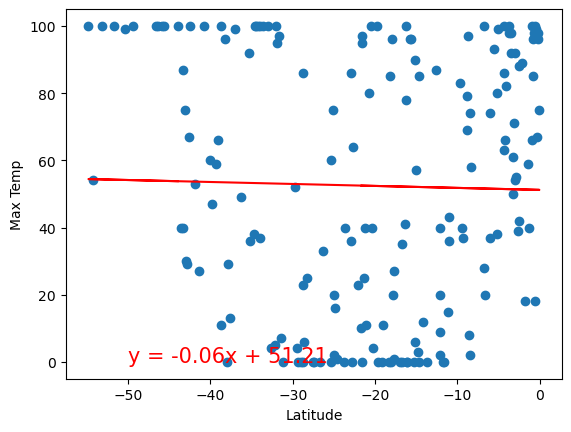

In [35]:
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Cloudiness"]
ylabel = 'Max Temp'
x = -50
y = 0
create_lin_reg(x_values,y_values,x,y,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011144379168576166


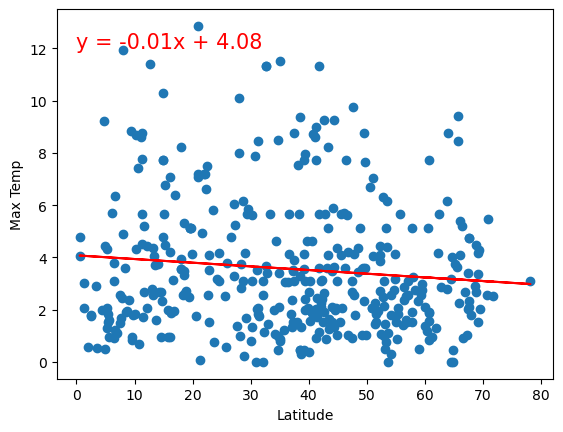

In [41]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
ylabel = 'Max Temp'
x = 0
y = 12
create_lin_reg(x_values,y_values,x,y,ylabel)

The r-value is: 0.12099905835730014


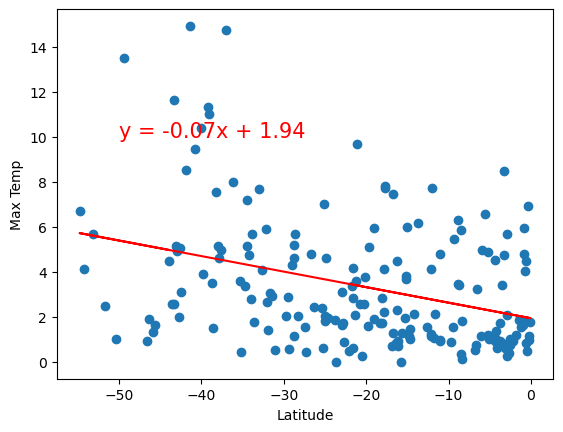

In [43]:
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Wind Speed"]
ylabel = 'Max Temp'
x = -50
y = 10
create_lin_reg(x_values,y_values,x,y,ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE